<a href="https://colab.research.google.com/github/cinimaticanchor/AI_Project/blob/main/AI_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Rahul Rajesh Modi
GWID: G29861398

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime
from scipy.optimize import minimize
import seaborn as sns

# Stocks and Bonds Data

In [ ]:
#give start date and end date for the amount of data you want
start_date = '2018-01-01'
end_date = '2024-11-06'
stocks = [
    "AAPL",
    "MSFT",
    "NVDA",
    "AMZN",
    "GOOGL",
    "GOOG",
    "META",
    #"TSLA",
    #"AVGO",
    "LLY",
    "V",
    "JNJ",
    "XOM",
    "JPM",
    "PG",
    "MA",
    "UNH",
    "HD",
    "CVX",
    "PFE",
    "KO",
    "PEP",
    "BAC",
    "ABBV",
    "MRK",
    "DIS",
    "CSCO",
    "CMCSA",
    "TMO",
    "INTC",
    "VZ",
    "ADBE",
    "NFLX",
    "NKE",
    "ABT",
    "QCOM",
    "COST",
    "C",
    "TXN",
    "CRM",
    "WFC",
    "BMY",
    "MDT",
    "ACN",
    "NEE",
    "AXP"
]

bonds = ['MFAFX', 'ABNFX']
assets = stocks + bonds

In [ ]:
assets_data = {}
for asset in assets:
  ticker = yf.Ticker(asset)
  assets_data[asset] = ticker.history(start=start_date, end=end_date)['Close']
data = pd.DataFrame(assets_data)

In [ ]:
data.head()

,AAPL,MSFT,NVDA,AMZN,GOOGL,GOOG,META,LLY,V,JNJ,...,TXN,CRM,WFC,BMY,MDT,ACN,NEE,AXP,MFAFX,ABNFX
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02 00:00:00-05:00,40.524353,79.633514,4.929881,59.450500,53.466679,53.059353,180.875412,75.712486,109.104301,114.761620,...,87.092857,103.948540,49.954891,48.380386,69.266823,138.659607,32.770103,89.724556,8.123302,10.043851
2018-01-03 00:00:00-05:00,40.517281,80.004105,5.254335,60.209999,54.378876,53.930225,184.115662,76.123779,110.190475,115.857864,...,89.452293,104.824638,50.339214,48.419846,70.707603,139.299545,32.074944,90.277740,8.131413,10.051661
2018-01-04 00:00:00-05:00,40.705482,80.708267,5.282033,60.479500,54.590103,54.125519,183.776672,76.463524,110.600174,115.849632,...,89.336807,106.208496,50.968868,49.047340,70.876114,140.948975,31.910133,91.779335,8.123302,10.051661
2018-01-05 00:00:00-05:00,41.168938,81.708893,5.326795,61.457001,55.313980,54.914188,186.289108,77.402328,113.248947,116.805771,...,90.021530,107.622223,51.312309,49.158531,72.072556,142.111664,32.055920,91.988640,8.115197,10.043851
2018-01-08 00:00:00-05:00,41.016018,81.792297,5.490010,62.343498,55.509274,55.148846,187.714813,77.008919,113.706291,116.954124,...,90.450531,108.378868,50.731724,49.174419,72.047279,143.247391,32.320045,91.142281,8.115197,10.036036


In [ ]:
data.describe()

,AAPL,MSFT,NVDA,AMZN,GOOGL,GOOG,META,LLY,V,JNJ,...,TXN,CRM,WFC,BMY,MDT,ACN,NEE,AXP,MFAFX,ABNFX
count,1723.000000,1723.000000,1723.000000,1723.000000,1723.000000,1723.000000,1723.000000,1723.000000,1723.000000,1723.000000,...,1723.000000,1723.000000,1723.000000,1723.000000,1723.000000,1723.000000,1723.000000,1723.000000,1723.000000,1723.000000
mean,119.806064,233.472946,26.455093,127.400123,99.484846,99.972202,257.892229,292.017759,198.387044,138.496159,...,138.598092,196.028665,41.809638,52.590895,87.332408,244.303740,60.665047,140.693720,8.599330,10.974585
std,57.352514,104.518807,31.955706,37.052779,37.464247,38.066580,111.047017,236.837737,45.129696,19.482847,...,36.103776,51.328695,9.064386,8.940246,12.923276,72.676315,15.350999,46.336851,0.415732,0.712773
min,33.952553,78.762589,3.151429,59.450500,49.055668,48.636250,88.643105,66.351234,108.485008,97.362221,...,74.312569,103.570213,19.162117,35.551273,63.818161,122.653976,30.699394,64.601059,7.810026,9.777557
25%,53.946465,131.754128,6.129411,92.324497,61.270889,60.825201,177.680031,109.802090,168.918945,119.316158,...,100.517040,153.797234,39.048262,46.948925,77.868633,171.802231,48.697660,99.634235,8.260242,10.458840
50%,130.817032,236.187378,14.227144,125.779999,97.506531,98.366562,215.840134,203.372498,202.301880,145.188156,...,151.718872,188.811783,42.227482,52.176834,83.942368,258.994598,65.007645,139.933807,8.553382,10.885131
75%,167.632469,305.906158,27.758183,161.621498,132.226173,133.293556,315.993591,355.191833,226.263588,154.819603,...,167.479019,239.219734,46.462006,58.453239,95.376766,305.068848,72.762203,164.155785,9.075930,11.673467
max,236.220108,465.786438,143.700104,200.000000,190.708069,192.188690,595.940002,958.432678,292.733459,171.606277,...,212.938065,315.479462,65.234123,74.567558,122.323357,397.036957,86.384514,285.779999,9.232628,12.139814


In [ ]:
data = data.fillna(method='ffill').fillna(method='bfill')


<ipython-input-6-0b7746d80cd7>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill').fillna(method='bfill')


In [ ]:
returns = data.pct_change().dropna()#calulate returns of all the assets, check for na

In [ ]:
returns.tail()

,AAPL,MSFT,NVDA,AMZN,GOOGL,GOOG,META,LLY,V,JNJ,...,TXN,CRM,WFC,BMY,MDT,ACN,NEE,AXP,MFAFX,ABNFX
Date,,,,,,,,,,,,,,,,,,,,,
2024-10-30 00:00:00-04:00,-0.015278,0.001343,-0.013522,0.009956,0.028171,0.029216,-0.002495,-0.062806,0.029374,0.003248,...,-0.016182,-0.008331,0.001685,0.003048,0.001993,-0.045367,-0.005908,0.013497,-0.001144,-0.000885
2024-10-31 00:00:00-04:00,-0.018209,-0.060528,-0.047223,-0.032844,-0.019202,-0.019587,-0.040926,-0.020181,-0.001068,-0.004670,...,-0.016508,-0.016970,-0.007491,0.059058,-0.013812,-0.005049,0.002023,-0.014594,0.001725,0.003023
2024-11-01 00:00:00-04:00,-0.013280,0.009893,0.019885,0.061856,0.001052,-0.000232,-0.000740,-0.013028,0.003071,0.001689,...,0.008663,0.011497,-0.003697,-0.026000,0.009188,0.002465,-0.023975,0.009664,-0.003444,-0.004433
2024-11-04 00:00:00-05:00,-0.004038,-0.004654,0.004801,-0.010862,-0.011968,-0.011410,-0.011425,-0.015618,0.003818,-0.011803,...,-0.006149,0.011163,-0.015151,0.020803,-0.008438,-0.005121,0.013187,-0.009168,0.003456,0.003562
2024-11-05 00:00:00-05:00,0.006486,0.007345,0.028372,0.019001,0.002954,0.004277,0.020957,-0.000099,0.004934,0.000695,...,-0.005892,-0.001745,0.005808,0.009017,0.004143,0.004623,0.003573,0.021281,0.001148,0.001775


# Assign States and Weights to all the assets

In [ ]:
#we have three states bear,bull and neutral.
#this function will assign the states
def assign_states(returns, quantiles=(0.33, 0.67)):
    returns = pd.DataFrame(returns)#convert return to dataframe
    avg_ret = returns.mean(axis=1)#get average returns per day
    thresholds = [avg_ret.quantile(q) for q in quantiles]#set thresholds less than 0.33 bear, between 0.33 and 0.67 neutral state
    #lastly greater than 0.67 bull state.
    states = pd.cut(avg_ret, bins=[-np.inf, *thresholds, np.inf], labels=[0, 1, 2])

    return states



In [ ]:
#divide weights for start the model will change these weights to optimize
#to start I have divided weights as 0.7 / lenght of stocks and 0.3 by length of bonds
#i.e all the stocks have same weight and all the bonds have same weight
#weight can be seen as the how much the asset is part of the portfolio.
stock_weights = 0.7 / len(stocks)
bond_weights = 0.3 / len(bonds)

weights = {asset: stock_weights if asset in stocks else bond_weights for asset in assets}

In [ ]:
weights

{'AAPL': 0.015909090909090907,
 'MSFT': 0.015909090909090907,
 'NVDA': 0.015909090909090907,
 'AMZN': 0.015909090909090907,
 'GOOGL': 0.015909090909090907,
 'GOOG': 0.015909090909090907,
 'META': 0.015909090909090907,
 'LLY': 0.015909090909090907,
 'V': 0.015909090909090907,
 'JNJ': 0.015909090909090907,
 'XOM': 0.015909090909090907,
 'JPM': 0.015909090909090907,
 'PG': 0.015909090909090907,
 'MA': 0.015909090909090907,
 'UNH': 0.015909090909090907,
 'HD': 0.015909090909090907,
 'CVX': 0.015909090909090907,
 'PFE': 0.015909090909090907,
 'KO': 0.015909090909090907,
 'PEP': 0.015909090909090907,
 'BAC': 0.015909090909090907,
 'ABBV': 0.015909090909090907,
 'MRK': 0.015909090909090907,
 'DIS': 0.015909090909090907,
 'CSCO': 0.015909090909090907,
 'CMCSA': 0.015909090909090907,
 'TMO': 0.015909090909090907,
 'INTC': 0.015909090909090907,
 'VZ': 0.015909090909090907,
 'ADBE': 0.015909090909090907,
 'NFLX': 0.015909090909090907,
 'NKE': 0.015909090909090907,
 'ABT': 0.015909090909090907,
 '

In [ ]:
#we want to know what is the portfoli return with given weights
weights_array = np.array([weights[asset] for asset in assets])
portfolio_returns = returns.dot(weights_array)


In [ ]:
portfolio_returns.dropna()

,0
Date,
2018-01-03 00:00:00-05:00,0.005189
2018-01-04 00:00:00-05:00,0.003262
2018-01-05 00:00:00-05:00,0.005233
2018-01-08 00:00:00-05:00,-0.000059
2018-01-09 00:00:00-05:00,-0.000537
...,...
2024-10-30 00:00:00-04:00,-0.001702
2024-10-31 00:00:00-04:00,-0.005620
2024-11-01 00:00:00-04:00,0.002656


In [ ]:
#assign states based on above returns
states = assign_states(portfolio_returns)
print("States value counts:")
print(states.value_counts())

States value counts:
1    586
0    568
2    568
Name: count, dtype: int64


# Markov Chain

In [ ]:
def markov_chain(states, threshold=1e-8, max_iter=1000):
    #get current and next possible states
    current_states = states[:-1].reset_index(drop=True)
    next_states = states[1:].reset_index(drop=True)
    #get transition matrix using pd.crosstab, which wwill count the number of times a state transitioned from one to other and then normalize it to get probabilities
    transition_matrix = pd.crosstab(current_states, next_states, normalize='index').to_numpy()
    #intial vector of 1/3
    state_vector = np.ones(transition_matrix.shape[0]) / transition_matrix.shape[0]
    #steady state tells us the time model spends in one state
    #to get state vector we do following steps
    for i in range(max_iter):
        next_vector = state_vector @ transition_matrix #get next vector by multipplying state vector with transtion matrix
        if np.linalg.norm(next_vector - state_vector) < threshold: #if the differnece is less tha above given threshold break from loop and return values
            break
        state_vector = next_vector#else state vector is changed
    return transition_matrix, state_vector

In [ ]:
transition_matrix, steady_state = markov_chain(states) #get state vectors and transition matrix
print("Transition Matrix:")
print(transition_matrix)
print("Steady State Distribution:", steady_state)

Transition Matrix:
[[0.35915493 0.27640845 0.36443662]
 [0.32593857 0.37713311 0.29692833]
 [0.30511464 0.36684303 0.32804233]]
Steady State Distribution: [0.33004067 0.34049971 0.32945961]


# Monte Carlo


In [ ]:
# get values of portfoliio returns with respect to the states
#mean_state is mean of portfolio returns wrt states and
#std_states is standard deviation wrt to states.
mean_state = {state: portfolio_returns[states == state].mean() for state in [0, 1, 2]}
std_state = {state: portfolio_returns[states == state].std() for state in [0, 1, 2]}
state_stats = {state: (mean_state[state], std_state[state]) for state in [0, 1, 2]}
#this data will help us in understanding the average return and risk with respect to each state

In [ ]:
state_stats

{0: (-0.007671801289606354, 0.007395720601977349),
 1: (0.0006994576471283059, 0.0013552797209543214),
 2: (0.008461461976021998, 0.006605495309397857)}

In [ ]:
def monte_carlo(current_state, transition_matrix, state_stats, n_simulations=10000, n_days=252):
    simulations = []#To store simulation result
    for i in range(n_simulations):#for n simulations
        state = current_state#get currrent state
        daily_returns = []#to store daily returns during simulation
        for j in range(n_days):#for one year
            mean, std = state_stats[state]#get mean and standard deviation for the state
            daily_return = np.random.normal(mean, std)#daily return baised on mean and standard deviation
            daily_returns.append(daily_return)
            state = np.random.choice([0, 1, 2], p=transition_matrix[state])#choose a state based on probabilites
        simulations.append(np.exp(np.cumsum(daily_returns)))#append the cumalitive value of daily returns
    return np.array(simulations)

In [ ]:
current_state = states.iloc[-1] #most recent state
simulations = monte_carlo(# do mnte calro simulations
    current_state=current_state,
    transition_matrix=transition_matrix,
    state_stats=state_stats,
    n_simulations=10000,
    n_days=252
)

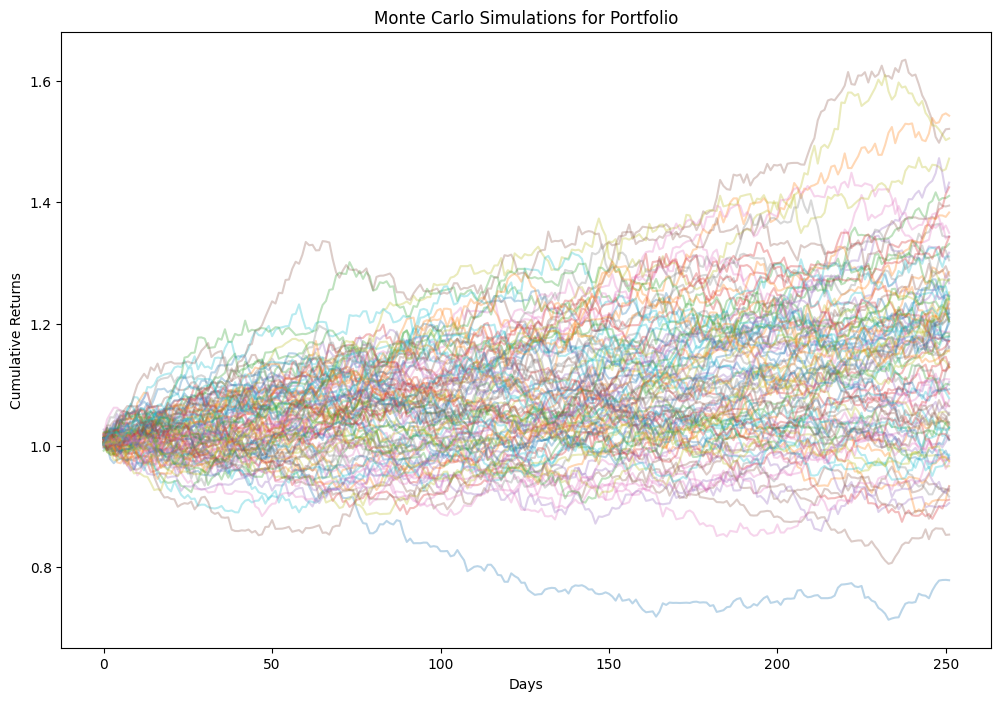

In [ ]:
plt.figure(figsize=(12, 8))
for sim in simulations[:100]:
    plt.plot(sim, alpha=0.3)
plt.title("Monte Carlo Simulations for Portfolio")
plt.xlabel("Days")
plt.ylabel("Cumulative Returns")
plt.show()


#Particle Filter

In [ ]:
#filter will focus on paths that are more consistent
def particle_filter(simulations, values):
    particles = simulations[:, -1] #get the final portfolio values from simulation
    likelihoods = np.exp(-0.5 * ((particles - values.mean()) / values.std()) ** 2)#the likelihood of each particle based on returns
    weights = likelihoods / likelihoods.sum()#normalize
    resampled_indices = np.random.choice(len(particles), size=len(particles), p=weights)#resample based on the weights
    return simulations[resampled_indices], weights


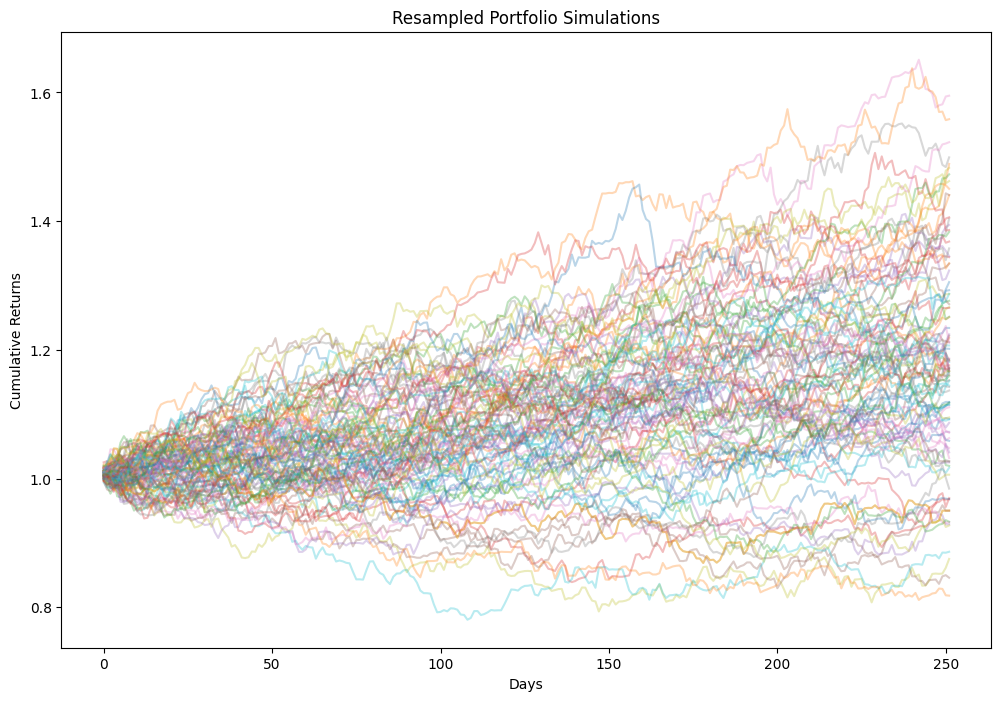

In [ ]:
values = data.iloc[-1].values#get values of most recent values
resampled_simulations, weights = particle_filter(simulations, values)#call particle filter

plt.figure(figsize=(12, 8))
for sim in resampled_simulations[:100]:
    plt.plot(sim, alpha=0.3)
plt.title("Resampled Portfolio Simulations")
plt.xlabel("Days")
plt.ylabel("Cumulative Returns")
plt.show()


In [ ]:
#funtion to optimize the portfolio
def optimize(expected_returns, covariance_matrix, regularization=0.01):
    def objective(weights):
        p_return = np.dot(weights, expected_returns)#calculate portfolio returns
        p_volatility = np.sqrt(np.dot(weights.T, np.dot(covariance_matrix, weights)))#volatility
        sharpe_ratio = (p_return - risk_free_rate) / p_volatility#calculate sharpe ratio
        penalty = regularization * np.sum(weights**2)#penalize large weights
        return -(sharpe_ratio - penalty)#return sharpe ratio -penalty to minimize
#without penalty the model will not learn to distribute the portfolio
#when I ran the without portfolio it would assign weights only to bonds I have taken as they have steady growth over time and have better returns than most of the stocks with lesser risk and volatility
    constraints = [{'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1}]#making sure weights sum is not more than 1
    bounds = [(0, 0.3) for i in expected_returns]  # Enforce diversification

    result = minimize(objective, x0=[1/len(expected_returns)] * len(expected_returns),
                      constraints=constraints, bounds=bounds)#using scipy.optimize.minimize(import) we calculate optimized weights, with pbjective function, bounds, initial weights and constraints as inputs.
    return result.x#return otimized weights


Optimized Portfolio Weights: [0.  0.  0.3 0.  0.  0.  0.3 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.1 0.  0.  0.3 0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]


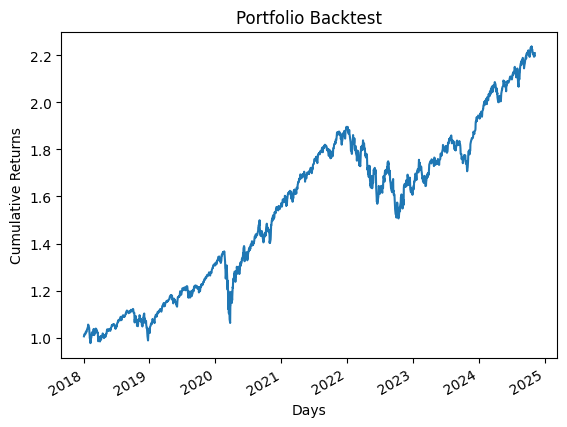

In [ ]:
#change as per requirement (I have triedd keeping between (0.0.1- 0.05))
risk_free_rate = 0.01
expected_returns = returns.mean().values#
cov_matrix = np.cov(returns.T)  # Covariance matrix of asset returns

optimized_weights = optimize(expected_returns, cov_matrix)
print("Optimized Portfolio Weights:", optimized_weights.round(4))


#Backtest Portfolio
cumulative_returns = (1 + portfolio_returns).cumprod()
cumulative_returns.plot(title="Portfolio Backtest", xlabel="Days", ylabel="Cumulative Returns")
plt.show()

In [ ]:
#assets with non-zero weights
non_zero_indices = np.where(optimized_weights > 0.01)[0]
filtered_assets = [assets[i] for i in non_zero_indices]
filtered_weights = optimized_weights[non_zero_indices]
filtered_returns = returns[filtered_assets]
print("Filtered Assets:", filtered_assets)
print("Filtered Weights:", filtered_weights)


Filtered Assets: ['NVDA', 'META', 'NFLX', 'QCOM']
Filtered Weights: [0.3 0.3 0.1 0.3]


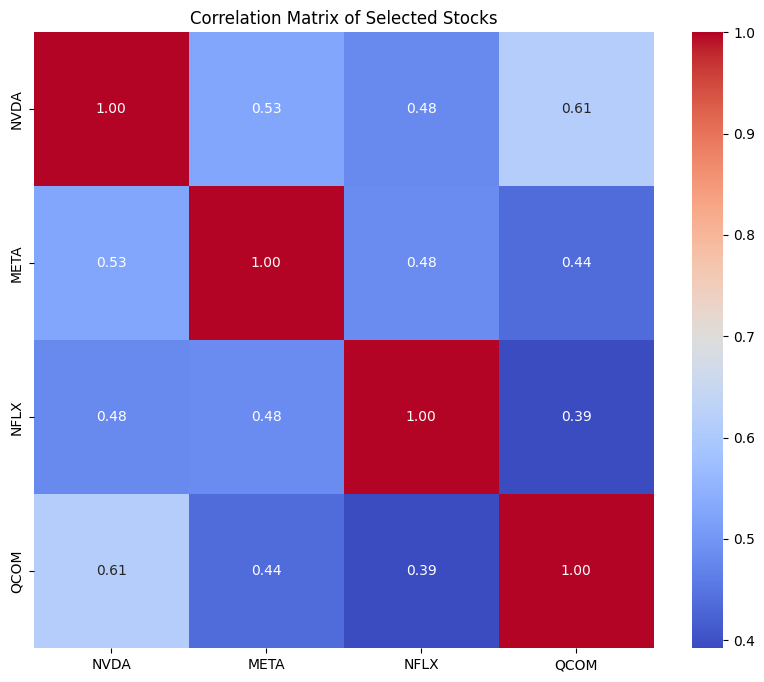

In [ ]:


#correlation matrix
correlation_matrix = filtered_returns.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix of Selected Stocks")
plt.show()

# Comaprision of basic portfolio and optimized portfolio over time


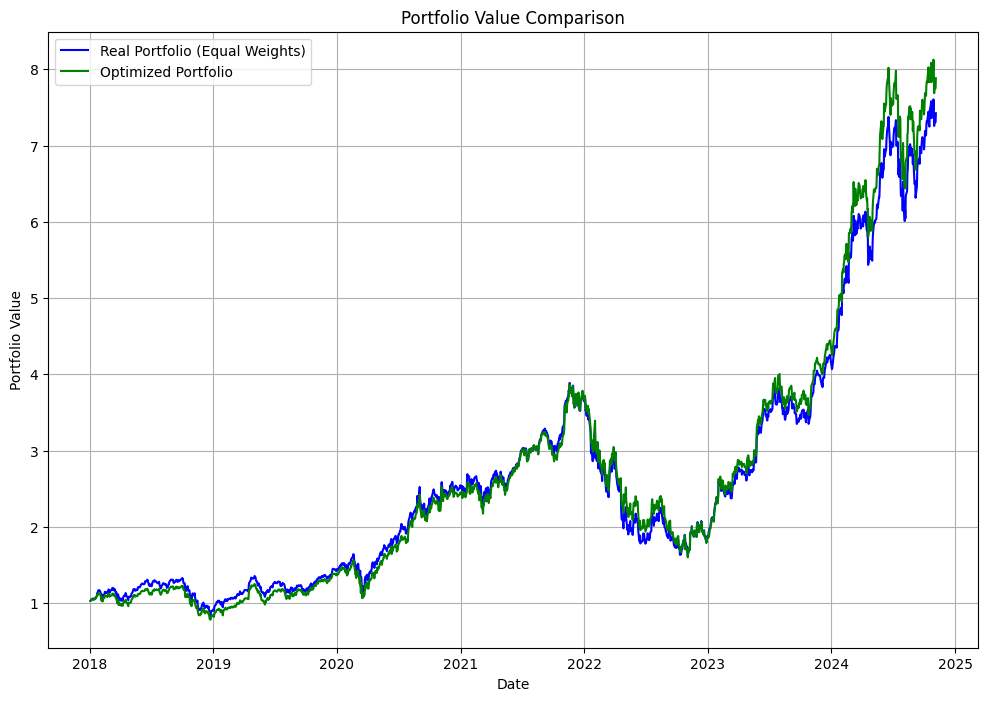

In [ ]:
initial_weights_array = np.array([1/len(filtered_assets)] * len(filtered_assets))
real_portfolio_returns = filtered_returns.dot(initial_weights_array)
real_portfolio_cumulative = (1 + real_portfolio_returns).cumprod()
optimized_portfolio_returns = filtered_returns.dot(filtered_weights)
optimized_portfolio_cumulative = (1 + optimized_portfolio_returns).cumprod()
plt.figure(figsize=(12, 8))
plt.plot(real_portfolio_cumulative, label="Real Portfolio (Equal Weights)", color="blue")
plt.plot(optimized_portfolio_cumulative, label="Optimized Portfolio", color="green")
plt.title("Portfolio Value Comparison")
plt.xlabel("Date")
plt.ylabel("Portfolio Value")
plt.legend()
plt.grid(True)
plt.show()


### The code Below is not mine I have used a modified version of the code given in the link below, since web scrapping and sentiment value is not the purpose of the project but using them is  the code gives the sentiment value by scrapping news about all the stocks we have taken - [Github](https://github.com/SaloniJhalani/Stock-Market-Live-Sentiment/blob/main/update_sentiment_page.py)

In [ ]:
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
import time
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

nltk.download('vader_lexicon')
vader = SentimentIntensityAnalyzer()
tickers = stocks
finwiz_url = 'https://finviz.com/quote.ashx?t='
news_tables = {}
for ticker in tickers:
    url = finwiz_url + ticker
    req = Request(url=url, headers={'User-Agent': 'Mozilla/5.0'})
    response = urlopen(req)
    html = BeautifulSoup(response, 'html.parser')
    news_table = html.find(id='news-table')
    news_tables[ticker] = news_table
    time.sleep(1)
parsed_news = []
for ticker, news_table in news_tables.items():
    if news_table:
        for row in news_table.findAll('tr'):
            if row.a:
                headline = row.a.get_text()

                date_data = row.td.text.split()
                if len(date_data) == 1:
                    time = date_data[0]
                else:
                    date = date_data[0]
                    time = date_data[1]

                sentiment = vader.polarity_scores(headline)

                parsed_news.append([ticker, date, time, headline, sentiment['neg'], sentiment['neu'], sentiment['pos'], sentiment['compound']])


columns = ['Ticker', 'Date', 'Time', 'Headline', 'Negative', 'Neutral', 'Positive', 'Compound']
news_sentiment_df = pd.DataFrame(parsed_news, columns=columns)
print(news_sentiment_df.head())

news_sentiment_df.to_csv('stock_news_sentiment.csv', index=False)


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


  Ticker   Date     Time                                           Headline  \
0   AAPL  Today  04:36PM  Broadcom Earnings Top Estimates After AI Fuels...   
1   AAPL  Today  03:25PM  Magnificent Seven Stocks: Nvidia Stock Slides;...   
2   AAPL  Today  02:49PM  Citi Analyst Highlights Apple's iOS 18.2 Launc...   
3   AAPL  Today  02:47PM  Apple nears switch to in-house Bluetooth and W...   
4   AAPL  Today  01:57PM  Apple nears switch from Broadcom chips; eyes i...   

   Negative  Neutral  Positive  Compound  
0       0.0    0.614     0.386    0.5267  
1       0.0    0.719     0.281    0.5994  
2       0.0    1.000     0.000    0.0000  
3       0.0    0.838     0.162    0.4019  
4       0.0    1.000     0.000    0.0000  


In [ ]:
news_sentiment_df

,Ticker,Date,Time,Headline,Negative,Neutral,Positive,Compound
0,AAPL,Today,04:36PM,Broadcom Earnings Top Estimates After AI Fuels...,0.0,0.614,0.386,0.5267
1,AAPL,Today,03:25PM,Magnificent Seven Stocks: Nvidia Stock Slides;...,0.0,0.719,0.281,0.5994
2,AAPL,Today,02:49PM,Citi Analyst Highlights Apple's iOS 18.2 Launc...,0.0,1.000,0.000,0.0000
3,AAPL,Today,02:47PM,Apple nears switch to in-house Bluetooth and W...,0.0,0.838,0.162,0.4019
4,AAPL,Today,01:57PM,Apple nears switch from Broadcom chips; eyes i...,0.0,1.000,0.000,0.0000
...,...,...,...,...,...,...,...,...
4395,AXP,Oct-18-24,07:25AM,"American Express Tops Profit Estimates, Raises...",0.0,0.492,0.508,0.7351
4396,AXP,Oct-18-24,07:14AM,"Amex Tops Profit Forecasts, Raises Earnings Gu...",0.0,0.446,0.554,0.7351
4397,AXP,Oct-18-24,07:09AM,American Express: Q3 Earnings Snapshot,0.0,1.000,0.000,0.0000
4398,AXP,Oct-18-24,07:04AM,AmEx quarterly profit exceeds expectations on ...,0.0,0.707,0.293,0.4404


# We will now run Markov chains and monte carlo again but this time wrt to states assigned by sentiments and not the ticker value.

In [ ]:
def sentiments_by_ticker(news_sentiment_df): # this function cleans the data and gives grouped data by ticker and date
    def clean_date(date_string):
        today = datetime.now().date()
        if date_string == "Today":
            return today
        elif date_string == "Yesterday":
            return today - timedelta(days=1)
        else:
            try:
                return pd.to_datetime(date_string).date()
            except:
                return None

    news_sentiment_df['Date'] = news_sentiment_df['Date'].apply(clean_date)
    news_sentiment_df = news_sentiment_df.dropna(subset=['Date'])
    news_sentiment_df['Date'] = pd.to_datetime(news_sentiment_df['Date'])
    grouped_sentiment = news_sentiment_df.groupby(['Ticker', 'Date'])['Compound'].mean().reset_index()
    grouped_sentiment = grouped_sentiment.rename(columns={'Compound': 'Average_Sentiment'})
    return grouped_sentiment


In [ ]:
def assign_states(grouped_sentiment):# we use group_sentiments in place of returns from previous step
    quantiles = grouped_sentiment['Average_Sentiment'].quantile([0.33, 0.67])
    low_threshold = quantiles[0.33]
    high_threshold = quantiles[0.67]

    def assign_state(sentiment):
        if sentiment <= low_threshold:
            return 'Bear'
        elif sentiment <= high_threshold:
            return 'Neutral'
        else:
            return 'Bull'

    grouped_sentiment['State'] = grouped_sentiment['Average_Sentiment'].apply(assign_state)
    return grouped_sentiment


In [ ]:
def compute_markov_chain(states):
    unique_states = states.unique() #get unique states
    state_indices = {state: i for i, state in enumerate(unique_states)} #enumerate them
    num_states = len(unique_states)#total states

    transition_counts = np.zeros((num_states, num_states)) #mnake transition from one state to next state as zero
    for (current_state, next_state) in zip(states[:-1], states[1:]):#using both current and next state calculate transition counts
        i, j = state_indices[current_state], state_indices[next_state]
        transition_counts[i, j] += 1

    transition_matrix = transition_counts / transition_counts.sum(axis=1, keepdims=True)# make transition matrix
    state_vector = np.ones(num_states) / num_states #get state vector
    for i in range(1000): # for x iterations
        next_vector = state_vector @ transition_matrix#get next state
        if np.linalg.norm(next_vector - state_vector) < 1e-8: #if the differnece is not bigger than given threshold break and return matrix and state vector
            break
        state_vector = next_vector#else we have a new state vector

    return transition_matrix, state_vector

Note- a big change both is that transtion matrix in here is based on sentiments and not returns below you will see the transition matrix with differnet values for the same reason. Nonte carlo is still running on daily returns  but state transition is based on sentiment.

In [ ]:
def monte_carlo_simulation(current_state, transition_matrix, state_stats, n_simulations=10000, n_days=252):
    simulations = []#list to store simulations
    state_mapping = {0: 'Bear', 1: 'Neutral', 2: 'Bull'}#states

    for i in range(n_simulations):
        state = current_state
        daily_returns = []#list to store daily returns

        for j in range(n_days):
            mean, std = state_stats[state]#get mean and std
            daily_return = np.random.normal(mean, std)#get daily returns
            daily_returns.append(daily_return)

            #transtion to new state
            state = np.random.choice([0, 1, 2], p=transition_matrix[state])

        simulations.append(np.cumsum(daily_returns))

    return np.array(simulations)

In [ ]:
#optimization function
#we take expected returns, covarinace matrix and set regularization
#while doing otimiztion I faced a problem where all the stocks were getting the same weights to change that regularization was added

def optimize(expected_returns, covariance_matrix, regularization=0.01):
    def objective(weights):
        portfolio_return = np.dot(weights, expected_returns)
        portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(covariance_matrix, weights)))#calculate volatility
        sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_volatility#Sharpe ratio
        penalty = regularization * np.sum(weights**2)#penalty for large weights
        return -(sharpe_ratio - penalty) #maximize Sharpe ratio
    constraints = [{'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1}]#sum of weights = 1
    num_assets = len(expected_returns)#total assets
    bounds = [(0, 0.3) for i in range(num_assets)]#bounds for max weights
    initial_weights = [1 / num_assets] * num_assets#inital weights
    result = minimize(objective, initial_weights, constraints=constraints, bounds=bounds)#optimize
    return result.x#weights

def calculate_stock_returns(simulations, tickers):
    num_stocks = len(tickers)#number of stocks
    stock_simulations = simulations[:, :num_stocks]  #simulations for stocks only
    stock_returns = pd.DataFrame(stock_simulations).mean(axis=0)#mean returns
    stock_cov_matrix = pd.DataFrame(stock_simulations).cov() #covariance matrix
    return stock_returns, stock_cov_matrix #returns and covariance matrix

In [ ]:
tickers = stocks
grouped_sentiment = sentiments_by_ticker(news_sentiment_df)
grouped_sentiment = assign_states(grouped_sentiment)
transition_matrix, steady_state = compute_markov_chain(grouped_sentiment['State'])
print("Transition Matrix:\n", transition_matrix)
print("Steady-State Probabilities:\n", steady_state)
current_state_index = {'Bear': 0, 'Neutral': 1, 'Bull': 2}[grouped_sentiment['State'].iloc[-1]]
simulations = monte_carlo_simulation(current_state_index, transition_matrix, state_stats)
num_stocks = len(tickers)
simulations = simulations[:, :num_stocks]
stock_returns, stock_cov_matrix = calculate_stock_returns(simulations, tickers)

risk_free_rate = 0.01
optimized_weights = optimize(stock_returns.values, stock_cov_matrix.values)
print("Optimized Portfolio Weights:")
for ticker, weight in zip(tickers, optimized_weights):
    print(f"{ticker}: {weight:.4f}")
print(f"Sum of weights: {np.sum(optimized_weights):.4f}")


Transition Matrix:
 [[0.41282051 0.30512821 0.28205128]
 [0.27529412 0.41411765 0.31058824]
 [0.2761194  0.32587065 0.39800995]]
Steady-State Probabilities:
 [0.31950746 0.35014229 0.33035025]
Optimized Portfolio Weights:
AAPL: 0.0000
MSFT: 0.0000
NVDA: 0.0000
AMZN: 0.0000
GOOGL: 0.0000
GOOG: 0.0000
META: 0.0000
LLY: 0.0000
V: 0.0000
JNJ: 0.0000
XOM: 0.0000
JPM: 0.0000
PG: 0.0000
MA: 0.0000
UNH: 0.0000
HD: 0.0000
CVX: 0.0000
PFE: 0.0000
KO: 0.0000
PEP: 0.0000
BAC: 0.0000
ABBV: 0.0000
MRK: 0.0000
DIS: 0.0000
CSCO: 0.0000
CMCSA: 0.0000
TMO: 0.0000
INTC: 0.0000
VZ: 0.0000
ADBE: 0.0000
NFLX: 0.0000
NKE: 0.0000
ABT: 0.0000
QCOM: 0.0000
COST: 0.0000
C: 0.0000
TXN: 0.0000
CRM: 0.0000
WFC: 0.0000
BMY: 0.0000
MDT: 0.1002
ACN: 0.2998
NEE: 0.3000
AXP: 0.3000
Sum of weights: 1.0000


In [ ]:
#assets with non-zero weights
non_zero_indices = np.where(optimized_weights > 0.01)[0]
filtered_assets = [assets[i] for i in non_zero_indices]
filtered_weights = optimized_weights[non_zero_indices]
filtered_returns = returns[filtered_assets]
print("Filtered Assets:", filtered_assets)
print("Filtered Weights:", filtered_weights)


Filtered Assets: ['MDT', 'ACN', 'NEE', 'AXP']
Filtered Weights: [0.10022125 0.29977875 0.3        0.3       ]


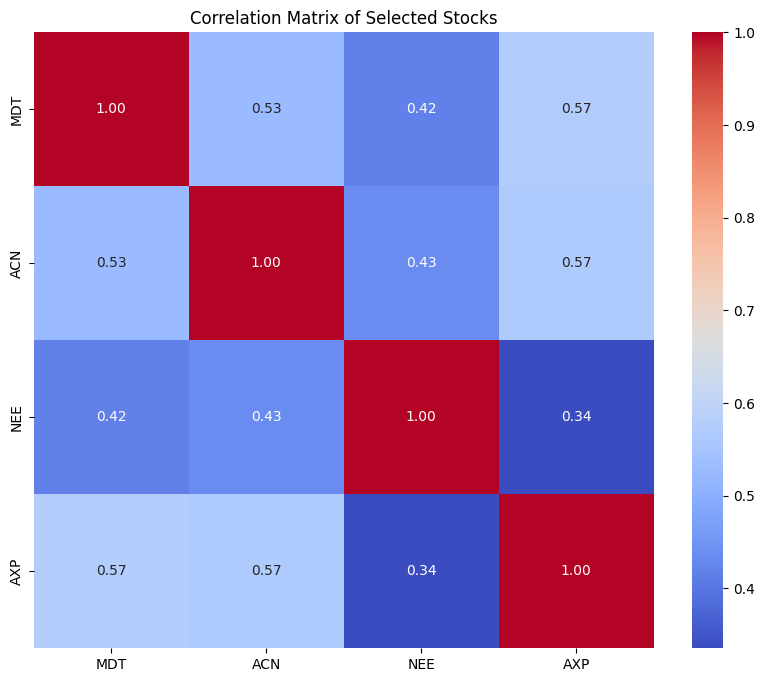

In [ ]:


#correlation matrix
correlation_matrix = filtered_returns.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix of Selected Stocks")
plt.show()

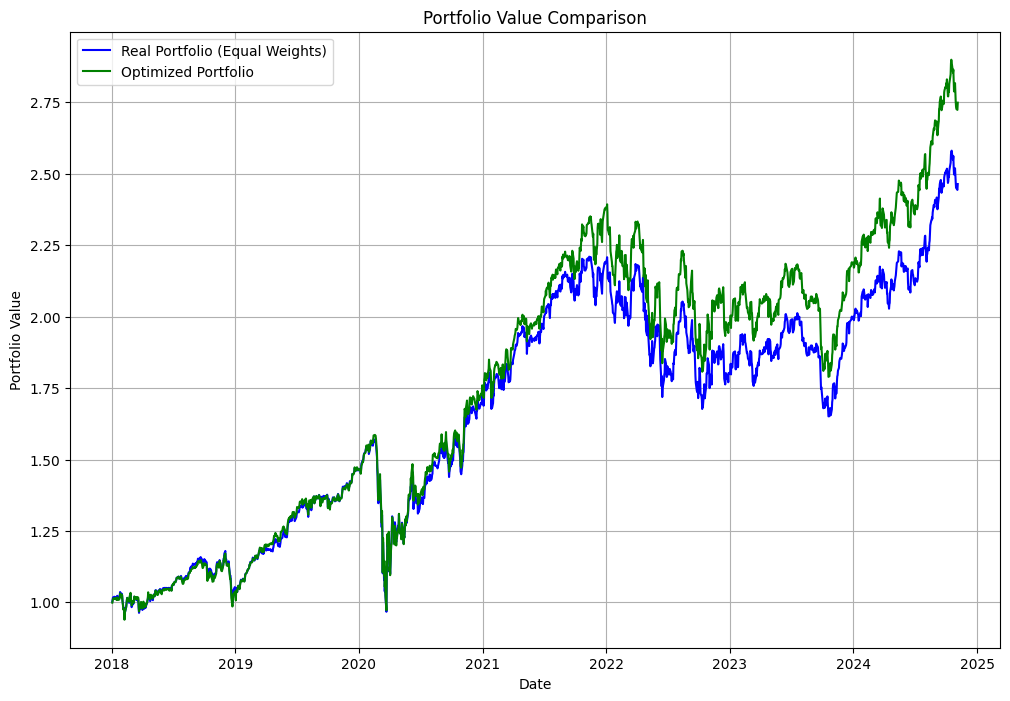

In [ ]:
initial_weights_array = np.array([1/len(filtered_assets)] * len(filtered_assets))
real_portfolio_returns = filtered_returns.dot(initial_weights_array)
real_portfolio_cumulative = (1 + real_portfolio_returns).cumprod()
optimized_portfolio_returns = filtered_returns.dot(filtered_weights)
optimized_portfolio_cumulative = (1 + optimized_portfolio_returns).cumprod()
plt.figure(figsize=(12, 8))
plt.plot(real_portfolio_cumulative, label="Real Portfolio (Equal Weights)", color="blue")
plt.plot(optimized_portfolio_cumulative, label="Optimized Portfolio", color="green")
plt.title("Portfolio Value Comparison")
plt.xlabel("Date")
plt.ylabel("Portfolio Value")
plt.legend()
plt.grid(True)
plt.show()
